<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/MNIST_Digit_Classification_Using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


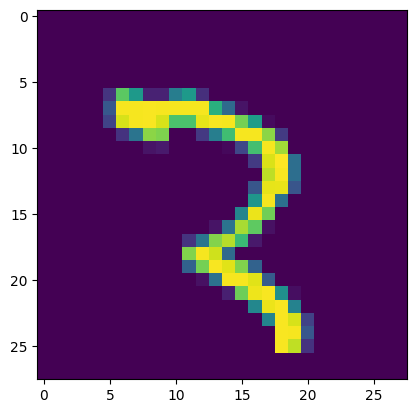

3


In [7]:
# displaying the image
plt.imshow(X_train[500])
plt.show()

# print the corresponding label
print(Y_train[500])

Image labels

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimension in this dataset, if not, we have to resize all the images to a common dimension

In [10]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
# setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = 'relu'),# Rectified Linear Unit
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the Neural Network
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
# training the Neural Network
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8459 - loss: 0.5299
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9568 - loss: 0.1488
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9679 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9750 - loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9838 - loss: 0.0560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0413
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0353
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0318


Training data accuracy = 99%

**Accuracy on Test data**

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1191
0.9708999991416931


Test data accuracy = 97%

In [16]:
print(X_test.shape)

(10000, 28, 28)


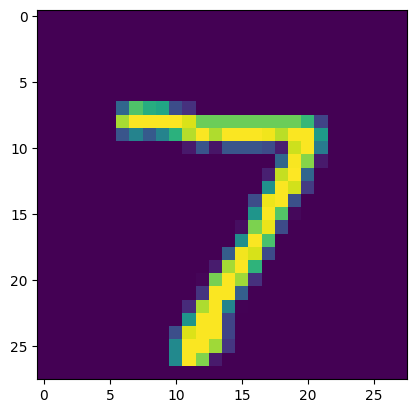

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[1.5284093e-01 1.4786377e-03 5.5541992e-01 9.9688655e-01 5.6918554e-07
 1.2204347e-01 8.4443369e-10 9.9999988e-01 1.2618537e-03 9.8978466e-01]


model.predict() gives the prediction probability of each class for that data point

In [22]:
# converting the prediction probabilities to class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [23]:
# converting the prediction probabilities to class label for all data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True Labels

Y_pred_labels --> Predicted labels

Confusion Matrix

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 967    0    2    1    1    2    2    1    2    2]
 [   0 1114    1    4    0    2    4    3    7    0]
 [   2    1  995   16    1    0    4    4    9    0]
 [   0    0    4  995    0    3    0    5    1    2]
 [   3    0    3    0  950    1    8    5    1   11]
 [   4    0    0   18    1  852    6    1    7    3]
 [   3    2    2    0    5    7  934    2    3    0]
 [   2    1    9    1    3    0    2 1000    2    8]
 [   2    0    4   14    4    5    5    5  930    5]
 [   3    3    1    7   15    3    0    3    2  972]], shape=(10, 10), dtype=int32)


Text(0.5, 80.7222222222222, 'Predicted labels')

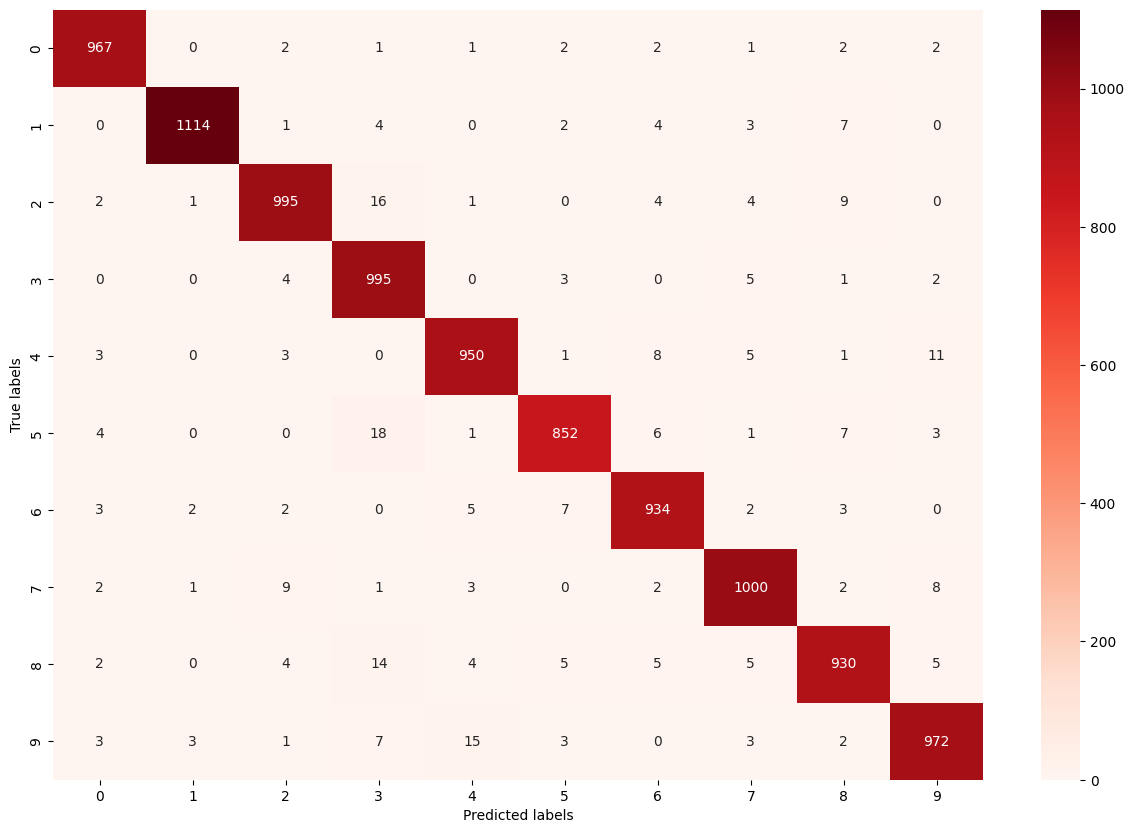

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Reds')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Building a Predictive System

In [27]:
!wget 'https://towardsdatascience.com/wp-content/uploads/2021/01/0kKxxK1YXSyWMEBtS.png'

--2025-09-23 18:39:06--  https://towardsdatascience.com/wp-content/uploads/2021/01/0kKxxK1YXSyWMEBtS.png
Resolving towardsdatascience.com (towardsdatascience.com)... 141.193.213.20, 141.193.213.21
Connecting to towardsdatascience.com (towardsdatascience.com)|141.193.213.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2855 (2.8K) [image/png]
Saving to: ‘0kKxxK1YXSyWMEBtS.png’

0kKxxK1YXSyWMEBtS.p 100%[===================>]   2.79K  --.-KB/s    in 0s      

2025-09-23 18:39:06 (16.5 MB/s) - ‘0kKxxK1YXSyWMEBtS.png’ saved [2855/2855]



In [32]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [51 51 51]
  ...
  [51 51 51]
  [51 51 51]
  [19 19 19]]]


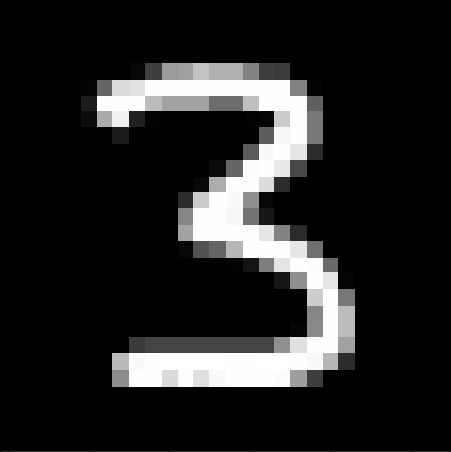

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(452, 451, 3)

In [37]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(452, 451)

In [39]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [40]:
input_image_resize.shape

(28, 28)

In [41]:
cv2_imshow(input_image_resize)

In [42]:
input_image_resize = input_image_resize/255

In [43]:
type(input_image_resize)

numpy.ndarray

In [44]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [45]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[[1.7394720e-10 3.7464148e-01 8.4363061e-01 1.0000000e+00 1.2824501e-05
  3.5931366e-03 3.5768339e-13 2.7691042e-03 2.1787436e-01 6.4580941e-01]]


In [46]:
input_pred_label = np.argmax(input_prediction)

In [47]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted : /content/3.png


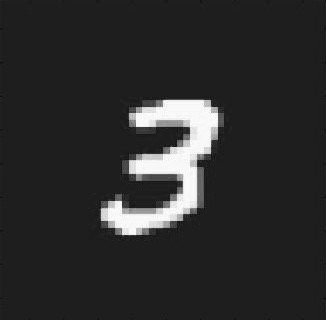

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The handwritten digit is recognized as :  3


In [49]:
input_image_path = input('Path of the image to be predicted : ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognized as : ', input_pred_label)